# Análise estatística descritiva 

## Parte 1 - Visualização do dataset AVC

### Importando o dataset

In [7]:
location <- 'stroke-data.csv'
data0 <- read.csv(location)

### Visualizando a estrutura interna do dataset

In [8]:
str(data0)


'data.frame':	5110 obs. of  12 variables:
 $ id               : int  9046 51676 31112 60182 1665 56669 53882 10434 27419 60491 ...
 $ gender           : chr  "Male" "Female" "Male" "Female" ...
 $ age              : num  67 61 80 49 79 81 74 69 59 78 ...
 $ hypertension     : int  0 0 0 0 1 0 1 0 0 0 ...
 $ heart_disease    : int  1 0 1 0 0 0 1 0 0 0 ...
 $ ever_married     : chr  "Yes" "Yes" "Yes" "Yes" ...
 $ work_type        : chr  "Private" "Self-employed" "Private" "Private" ...
 $ Residence_type   : chr  "Urban" "Rural" "Rural" "Urban" ...
 $ avg_glucose_level: num  229 202 106 171 174 ...
 $ bmi              : chr  "36.6" "N/A" "32.5" "34.4" ...
 $ smoking_status   : chr  "formerly smoked" "never smoked" "never smoked" "smokes" ...
 $ stroke           : int  1 1 1 1 1 1 1 1 1 1 ...


### Descrição das colunas

* id: identificador único
* gender: "Male", "Female" ou "Other" (Masculino, Feminino ou Outro)
* age: idade do paciente
* hypertension: 0 se o paciente não apresenta hipertensão, 1 se o paciente apresenta hipertensão
* heart_disease: 0 se o paciente não apresenta nenhuma doença cárdiaca, 1 se o paciente apresenta alguma doença cárdiaca
* ever_married: "No" ou "Yes" (Não ou Sim)
* work_type: "children", "Govt_job", "Never_worked", "Private" or "Self-employed" (Criança, Funcionário público, nunca trabalhou, iniciativa privada ou autônomo)
* Residence_type: "Rural" ou "Urban" (Zona rural ou Urbana)
* avg_glucose_level: Nível de glicose médio no sangue
* bmi: Índice de Massa Corporal
* smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown" * (Ex-fumante, nunca fumou, fuma, desconhecido)
* stroke: 1 se o paciente sofreu AVC ou 0 se o paciente não sofreu AVC.


* Obs: "Unknown" na coluna smoking_status significa que a informação está indisponível para este paciente.

### Estatísticas de sumário do dataset

In [9]:
summary(data0)

       id           gender               age         hypertension    
 Min.   :   67   Length:5110        Min.   : 0.08   Min.   :0.00000  
 1st Qu.:17741   Class :character   1st Qu.:25.00   1st Qu.:0.00000  
 Median :36932   Mode  :character   Median :45.00   Median :0.00000  
 Mean   :36518                      Mean   :43.23   Mean   :0.09746  
 3rd Qu.:54682                      3rd Qu.:61.00   3rd Qu.:0.00000  
 Max.   :72940                      Max.   :82.00   Max.   :1.00000  
 heart_disease     ever_married        work_type         Residence_type    
 Min.   :0.00000   Length:5110        Length:5110        Length:5110       
 1st Qu.:0.00000   Class :character   Class :character   Class :character  
 Median :0.00000   Mode  :character   Mode  :character   Mode  :character  
 Mean   :0.05401                                                           
 3rd Qu.:0.00000                                                           
 Max.   :1.00000                                      

In [10]:
# duplica o dataset
data1 <- data0

In [11]:
# Visualizando todas as variáveis categóricas(qualitativas)

lapply(subset(data1, select = c(gender, ever_married, work_type, Residence_type, bmi, smoking_status)), unique)

$gender
[1] "Male"   "Female" "Other" 

$ever_married
[1] "Yes" "No" 

$work_type
[1] "Private"       "Self-employed" "Govt_job"      "children"     
[5] "Never_worked" 

$Residence_type
[1] "Urban" "Rural"

$bmi
  [1] "36.6" "N/A"  "32.5" "34.4" "24"   "29"   "27.4" "22.8" "24.2" "29.7"
 [11] "36.8" "27.3" "28.2" "30.9" "37.5" "25.8" "37.8" "22.4" "48.9" "26.6"
 [21] "27.2" "23.5" "28.3" "44.2" "25.4" "22.2" "30.5" "26.5" "33.7" "23.1"
 [31] "32"   "29.9" "23.9" "28.5" "26.4" "20.2" "33.6" "38.6" "39.2" "27.7"
 [41] "31.4" "36.5" "33.2" "32.8" "40.4" "25.3" "30.2" "47.5" "20.3" "30"  
 [51] "28.9" "28.1" "31.1" "21.7" "27"   "24.1" "45.9" "44.1" "22.9" "29.1"
 [61] "32.3" "41.1" "25.6" "29.8" "26.3" "26.2" "29.4" "24.4" "28"   "28.8"
 [71] "34.6" "19.4" "30.3" "41.5" "22.6" "56.6" "27.1" "31.3" "31"   "31.7"
 [81] "35.8" "28.4" "20.1" "26.7" "38.7" "34.9" "25"   "23.8" "21.8" "27.5"
 [91] "24.6" "32.9" "26.1" "31.9" "34.1" "36.9" "37.3" "45.7" "34.2" "23.6"
[101] "22.3" "37.1" "45"   "25.5" "30.8" "37.4" "34.5" "27.9" "29.5" "46"  
[111] "42.5" "35.5" "26.9" "45.5" "31.5" "33"   "23.4" "30.7" "20.5" "21.5"
[121] "40"   "28.6" "42.2" "29.6" "35.4" "16.9" "26.8" "39.3" "32.6" "35.9"
[131] "21.2" "42.4" "40.5" "36.7" "29.3" "19.6" "18"   "17.6" "19.1" "50.1"
[141] "17.7" "54.6" "35"   "22"   "39.4" "19.7" "22.5" "25.2" "41.8" "60.9"
[151] "23.7" "24.5" "31.2" "16"   "31.6" "25.1" "24.8" "18.3" "20"   "19.5"
[161] "36"   "35.3" "40.1" "43.1" "21.4" "34.3" "27.6" "16.5" "24.3" "25.7"
[171] "21.9" "38.4" "25.9" "54.7" "18.6" "24.9" "48.2" "20.7" "39.5" "23.3"
[181] "64.8" "35.1" "43.6" "21"   "47.3" "16.6" "21.6" "15.5" "35.6" "16.7"
[191] "41.9" "16.4" "17.1" "29.2" "37.9" "44.6" "39.6" "40.3" "41.6" "39"  
[201] "23.2" "18.9" "36.1" "36.3" "46.5" "16.8" "46.6" "35.2" "20.9" "13.8"
[211] "31.8" "15.3" "38.2" "45.2" "17"   "49.8" "27.8" "60.2" "23"   "22.1"
[221] "26"   "44.3" "51"   "39.7" "34.7" "21.3" "41.2" "34.8" "19.2" "35.7"
[231] "40.8" "24.7" "19"   "32.4" "34"   "28.7" "32.1" "51.5" "20.4" "30.6"
[241] "71.9" "19.3" "40.9" "17.2" "16.1" "16.2" "40.6" "18.4" "21.1" "42.3"
[251] "32.2" "50.2" "17.5" "18.7" "42.1" "47.8" "20.8" "30.1" "17.3" "36.4"
[261] "12"   "36.2" "55.7" "14.4" "43"   "41.7" "33.8" "43.9" "22.7" "57.5"
[271] "37"   "38.5" "16.3" "44"   "32.7" "54.2" "40.2" "33.3" "17.4" "41.3"
[281] "52.3" "14.6" "17.8" "46.1" "33.1" "18.1" "43.8" "50.3" "38.9" "43.7"
[291] "39.9" "15.9" "19.8" "12.3" "78"   "38.3" "41"   "42.6" "43.4" "15.1"
[301] "20.6" "33.5" "43.2" "30.4" "38"   "33.4" "44.9" "44.7" "37.6" "39.8"
[311] "53.4" "55.2" "42"   "37.2" "42.8" "18.8" "42.9" "14.3" "37.7" "48.4"
[321] "50.6" "46.2" "49.5" "43.3" "33.9" "18.5" "44.5" "45.4" "55"   "54.8"
[331] "19.9" "17.9" "15.6" "52.8" "15.2" "66.8" "55.1" "18.2" "48.5" "55.9"
[341] "57.3" "10.3" "14.1" "15.7" "56"   "44.8" "13.4" "51.8" "38.1" "57.7"
[351] "44.4" "38.8" "49.3" "39.1" "54"   "56.1" "97.6" "53.9" "13.7" "11.5"
[361] "41.4" "14.2" "49.4" "15.4" "45.1" "49.2" "48.7" "53.8" "42.7" "48.8"
[371] "52.7" "53.5" "50.5" "15.8" "45.3" "14.8" "51.9" "63.3" "40.7" "61.2"
[381] "48"   "46.8" "48.3" "58.1" "50.4" "11.3" "12.8" "13.5" "14.5" "15"  
[391] "59.7" "47.4" "52.5" "13.2" "52.9" "61.6" "49.9" "54.3" "47.9" "13"  
[401] "13.9" "50.9" "57.2" "64.4" "92"   "50.8" "57.9" "45.8" "47.6" "14"  
[411] "46.4" "46.9" "47.1" "13.3" "48.1" "51.7" "46.3" "54.1" "14.9"

$smoking_status
[1] "formerly smoked" "never smoked"    "smokes"          "Unknown"

In [12]:
#Visualizando o sumário da coluna IMC
summary(data1$bmi)

   Length     Class      Mode 
     5110 character character 

In [13]:
# Contagem das variáveis únicas na coluna gênero
table(data1$gender)



Female   Male  Other 
  2994   2115      1 

In [14]:
# Contagem das variáveis únicas na coluna Fumante
table(data1$smoking_status)


formerly smoked    never smoked          smokes         Unknown 
            885            1892             789            1544 

In [15]:
# Contagem das variáveis únicas na coluna AVC
table(data1$stroke)


   0    1 
4861  249 

In [16]:
# Contagem das variáveis únicas na coluna Hipertensão
table(data1$hypertension)


   0    1 
4612  498 

In [17]:
# Contagem das variáveis únicas na coluna Ataque cardiáco
table(data1$heart_disease)


   0    1 
4834  276 

In [18]:
# Contagem das variáveis únicas na coluna Tipo de Trabalho
table(data1$work_type)


     children      Govt_job  Never_worked       Private Self-employed 
          687           657            22          2925           819 

## Parte 2 - Limpeza dos dados

In [19]:
# Converter BMI para numérico

data1$bmi <- as.numeric(data1$bmi)


Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [20]:
# Substituir N/As na coluna BMI pela média

data1$bmi[is.na(data1$bmi)] <- mean(data1$bmi,na.rm=TRUE)

# Visualizando o novo sumário da coluna BMI
summary(data1$bmi)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  10.30   23.80   28.40   28.89   32.80   97.60 

In [21]:
# como o gênero feminino é maioria, substituimos 'Other' para 'Female'
data1$gender <- ifelse(data1$gender == "Other", "Female", data1$gender)

# Contagem das variáveis únicas na coluna gênero revisada
table(data1$gender)


Female   Male 
  2995   2115 

In [22]:
# Calculamos a probabilidade de cada categoria de fumante, dado que só temos três possíveis categorias na coluna Fumante.
prob.FS <- 885 / (885 + 1892 + 789)
prob.NS <- 1892 / (885 + 1892 + 789)
prob.S <- 789 / (885 + 1892 + 789)

# Duplica o dataset
data2 <- data1

# Subistituindo a categoria "Unknown" na coluna Fumante pelas outras 3 categorias de acordo com sua porcentagem
library(tidyverse)

data2$rand <- runif(nrow(data2))
data2 <- data2%>%mutate(Probability = ifelse(rand <= prob.FS, "formerly smoked", ifelse(rand <= (prob.FS+prob.NS), "never smoked", ifelse(rand <= 1, "smokes", "Check"))))
data2 <- data2%>%mutate(smoking.status = ifelse(smoking_status == "Unknown", Probability, smoking_status))

# Contagem das variáveis únicas na coluna gênero revisada
table(data2$smoking.status)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
✔ purrr   0.3.4      
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ purrr::lift()   masks caret::lift()



formerly smoked    never smoked          smokes 
           1288            2697            1125 

In [23]:
# Removendo as colunas que não são necessárias 
data2 <- subset(data2, select = -c(rand,Probability,smoking_status,id))

## Parte 3 - Análise exploratória dos dados

### Parte 3.1 - Gráfico de barras por coluna

In [24]:
library("ggplot2")

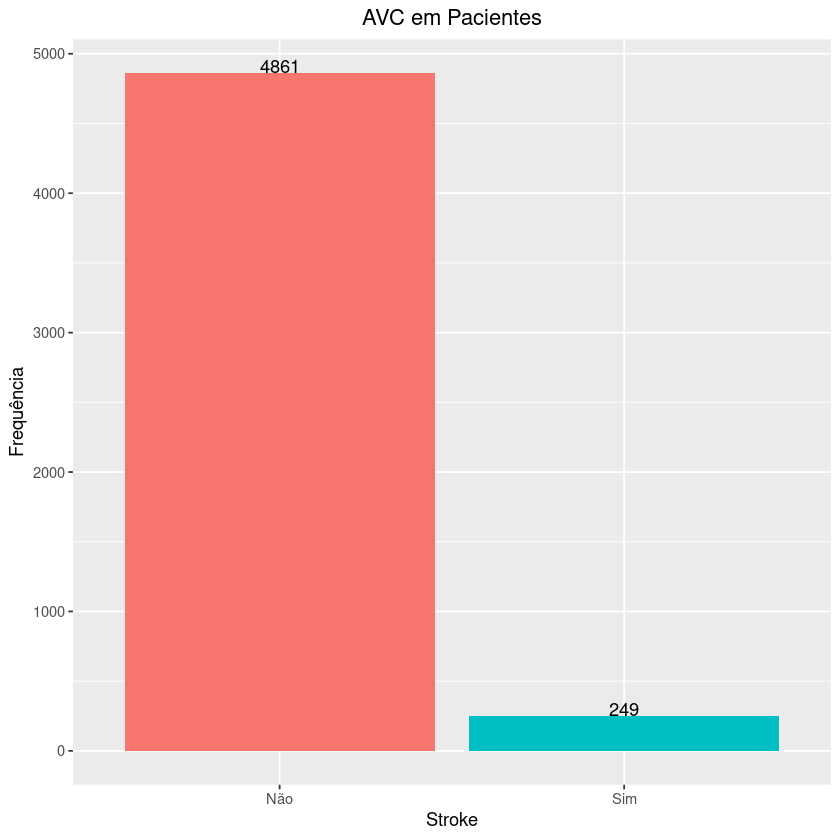

In [25]:
# Cria a tabela de contagem de AVC
strokecounts <- as.data.frame(table(data2$stroke))

# Troca os valores 1 e 0 por Sim e Não, respectivamente
strokecounts$Var1 <- ifelse(strokecounts$Var1 == 1, "Sim", 'Não') 

# Gráfico de Barras dos Pacientes que sofreram e não sofreram AVC
ggplot(strokecounts, aes(x = Var1, y = Freq, fill = Var1)) +
        geom_bar(stat = "identity") + theme(legend.position="none") +
        geom_text(aes(label = Freq), vjust = 0) +
        labs(title="AVC em Pacientes",x ="Stroke", y = "Frequência") +
        theme(plot.title = element_text(hjust = 0.5))

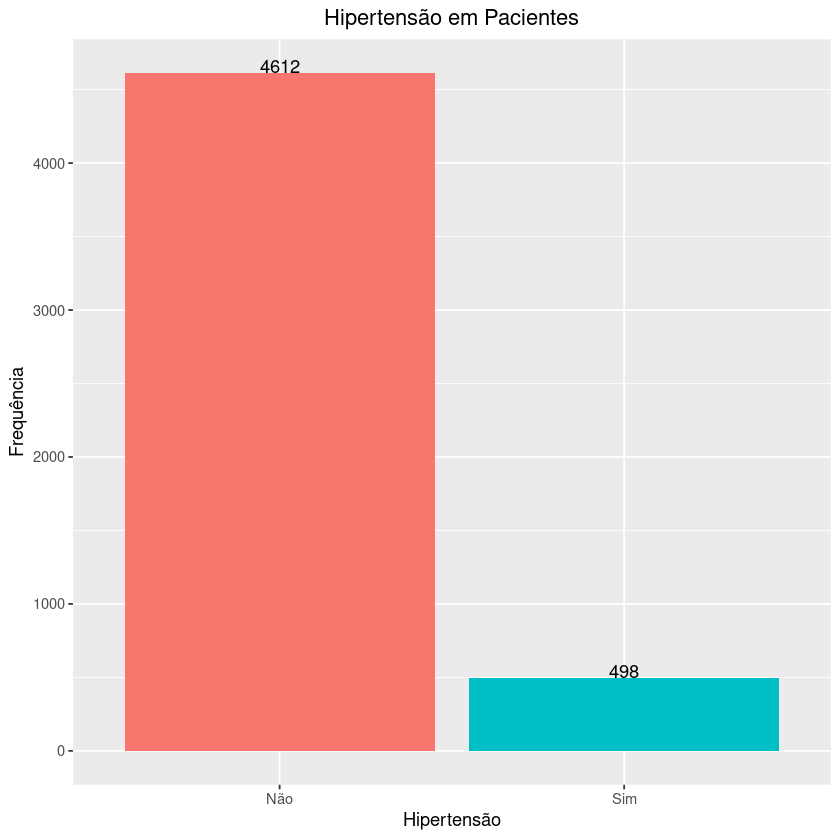

In [26]:
# Cria a tabela de contagem de Hipertensão
hypercounts <- as.data.frame(table(data2$hypertension))
  
# Troca os valores 1 e 0 por Sim e Não, respectivamente
hypercounts$Var1 <- ifelse(hypercounts$Var1 == 0, "Não", 'Sim')

# Gráfico de Barras para a coluna hipertensão : Não / Sim     
ggplot(hypercounts, aes(x = Var1, y = Freq, fill = Var1)) +
        geom_bar(stat = "identity") + theme(legend.position="none") +
        geom_text(aes(label = Freq), vjust = 0) +
        labs(title="Hipertensão em Pacientes",x ="Hipertensão", y = "Frequência") +
        theme(plot.title = element_text(hjust = 0.5))

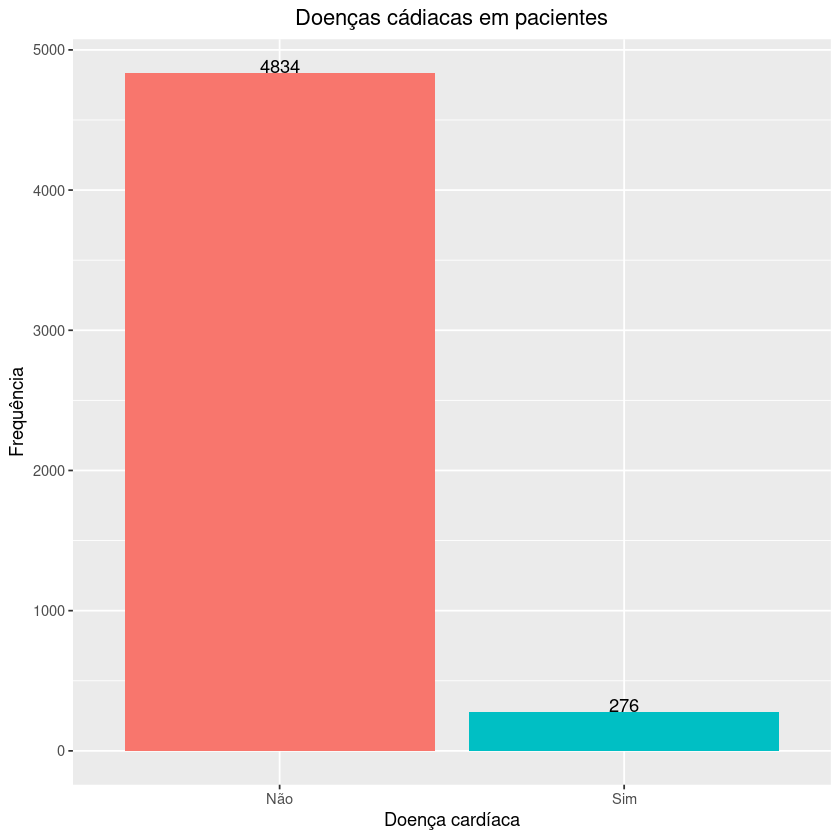

In [27]:
# Cria a tabela de contagem de Doenças Cardíacas

heartcounts <- as.data.frame(table(data2$heart_disease))


# Troca os valores 1 e 0 por Sim e Não, respectivamente
heartcounts$Var1 <- ifelse(heartcounts$Var1 == 0, "Não", 'Sim')

# Gráfico de Barras para a coluna Doenças Cárdiacas: Não / Sim
ggplot(heartcounts, aes(x = Var1, y = Freq, fill = Var1)) +
        geom_bar(stat = "identity") + theme(legend.position="none") +
        geom_text(aes(label = Freq), vjust = 0) +
        labs(title="Doenças cádiacas em pacientes",x ="Doença cardíaca", y = "Frequência") +
        theme(plot.title = element_text(hjust = 0.5))

- A quantidade de pacientes que não sofreram AVC é alta em relação aos que sofreram AVC.

- A quantidade de pacientes que não sofrem de Hipertensão é alta em relação aos que sofrem Hipertensão,
 mas a diferença é relativamente menor que a diferença vista em vítimas de AVC.

- A diferença entre pacientes com e sem doênças cardíacas se aproxima da diferença entre os pacientes que tiveram e não tiveram AVC.

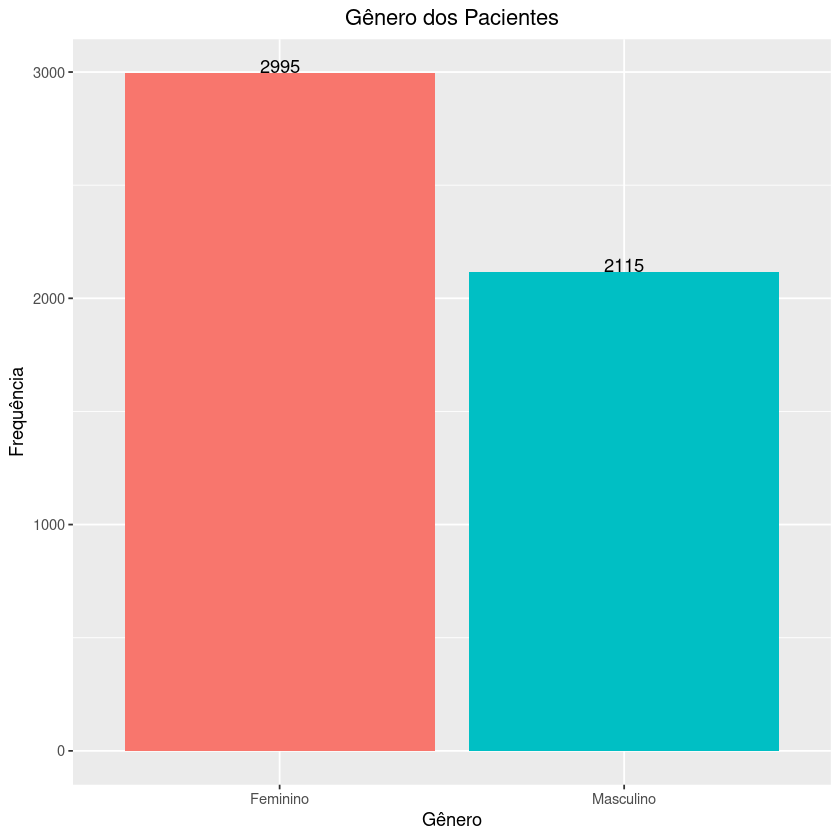

In [28]:
# Cria a tabela de contagem de Gênero

gendercounts <- as.data.frame(table(data2$gender))

# Troca os valores "Male" e "Female" por Masculino e Feminino, respectivamente
gendercounts$Var1 <- ifelse(gendercounts$Var1 == "Male", "Masculino", 'Feminino')
  
# Gráfico de Barras para a coluna Gênero

ggplot(gendercounts, aes(x = Var1, y = Freq, fill = Var1)) +
        geom_bar(stat = "identity") + theme(legend.position="none") +
        geom_text(aes(label = Freq), vjust = 0) +
        labs(title="Gênero dos Pacientes",x ="Gênero", y = "Frequência") +
        theme(plot.title = element_text(hjust = 0.5))


* Há mais pacientes do gênero feminino que pacientes do gênero masculino. 
* O único paciente que estava listado como "Other" foi adicionado na categoria "Female", dado que há mais pacientes do gênero feminino.

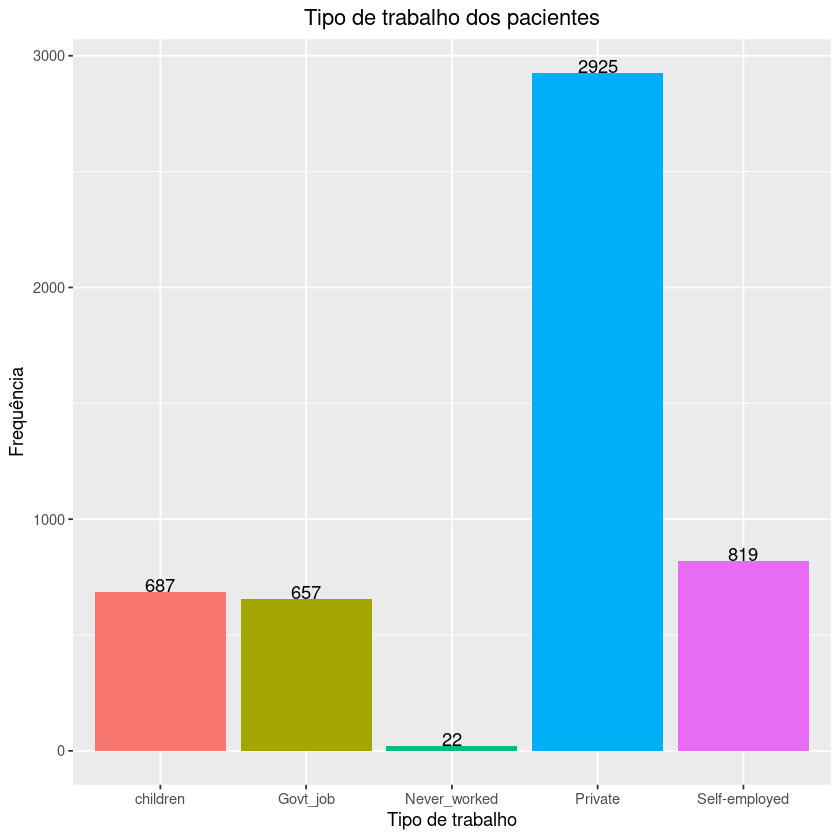

In [29]:
# Cria a tabela de contagem da coluna Tipo de trabalho

workcounts <- as.data.frame(table(data2$work_type))
  
# Gráfico de Barras para a coluna tipo de trabalho

ggplot(workcounts, aes(x = Var1, y = Freq, fill = Var1)) +
        geom_bar(stat = "identity") + theme(legend.position="none") +
        geom_text(aes(label = Freq), vjust = 0) +
        labs(title="Tipo de trabalho dos pacientes",x ="Tipo de trabalho", y = "Frequência") +
        theme(plot.title = element_text(hjust = 0.5))

* A quantidade de pacientes que trabalham em cargos públicos, autônomos e crianças se aproximam. 
* A maioria dos pacientes trabalham na iniciativa privada e a minoria nunca trabalhou.

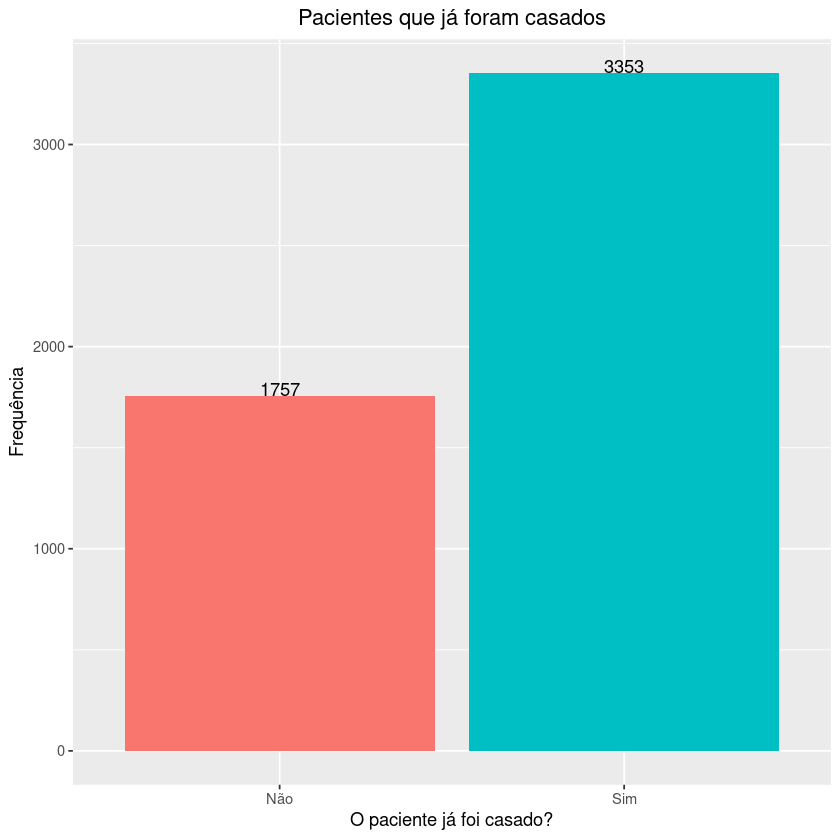

In [30]:
# Cria a tabela de contagem da coluna de pacientes que já se casaram
marriedcounts <- as.data.frame(table(data2$ever_married))
  

# Troca os valores "Yes" e "No" por Sim e Não, respectivamente
marriedcounts$Var1 <- ifelse(marriedcounts$Var1 == "No", "Não", 'Sim')
  
# Gráfico de Barras para a coluna de pacientes que já foram casados
ggplot(marriedcounts, aes(x = Var1, y = Freq, fill = Var1)) +
        geom_bar(stat = "identity") + theme(legend.position="none") +
        geom_text(aes(label = Freq), vjust = 0) +
        labs(title="Pacientes que já foram casados",x ="O paciente já foi casado?", y = "Frequência") +
        theme(plot.title = element_text(hjust = 0.5))

* Há aproximadamente o dobro de paciêncies que foram casados em relação aos que não foram.



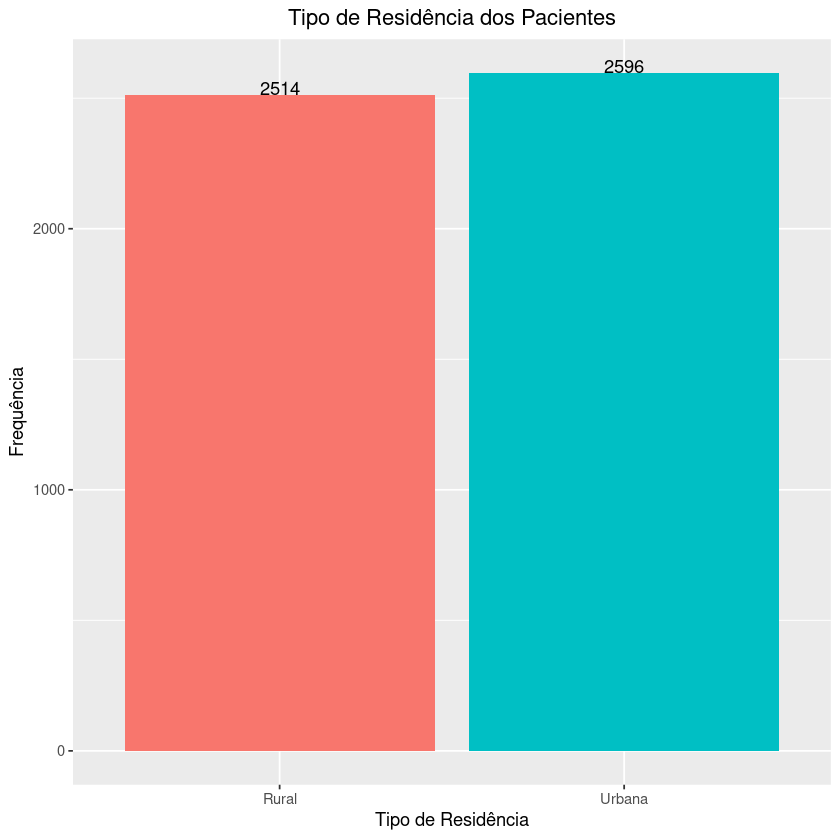

In [31]:
# Cria a tabela de contagem da coluna Tipo de Residência
rescounts <- as.data.frame(table(data2$Residence_type))

# Troca os valores "Urban" por Urbana
rescounts$Var1 <- ifelse(rescounts$Var1 == "Urban", "Urbana", 'Rural')
  
# Gráfico de Barras para a coluna Tipo de Residência
ggplot(rescounts, aes(x = Var1, y = Freq, fill = Var1)) +
        geom_bar(stat = "identity") + theme(legend.position="none") +
        geom_text(aes(label = Freq), vjust = 0) +
        labs(title="Tipo de Residência dos Pacientes",x ="Tipo de Residência", y = "Frequência") +
        theme(plot.title = element_text(hjust = 0.5))

* Os pacientes estão aproxidamente divididos por igual em residências rurais e urbanas.


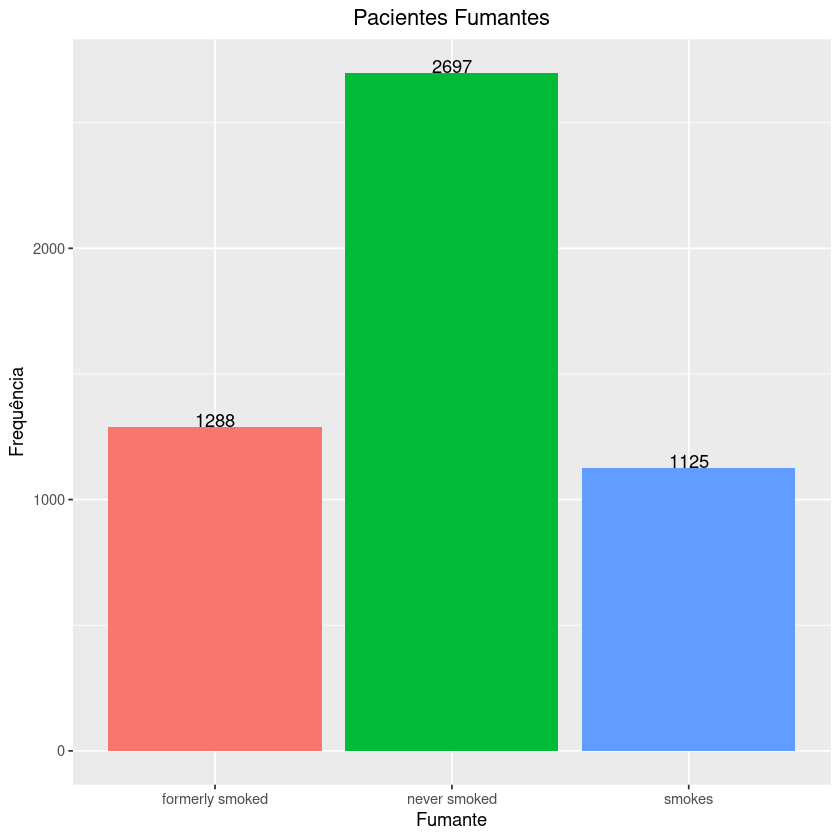

In [32]:
# Cria a tabela de contagem da coluna Fumante
smokecounts <- as.data.frame(table(data2$smoking.status))
  
# Gráfico de Barras para a coluna Fumante
ggplot(smokecounts, aes(x = Var1, y = Freq, fill = Var1)) +
        geom_bar(stat = "identity") + theme(legend.position="none") +
        geom_text(aes(label = Freq), vjust = 0) +
        labs(title="Pacientes Fumantes",x ="Fumante", y = "Frequência") +
        theme(plot.title = element_text(hjust = 0.5))

* Os dados desconhecidos foram aleatoriamente adicionados nas três categorias baseado em suas probabilidades.
* A maioria dos pacientes nunca fumaram
* A quantidade de pacientes ex-fumante e pacientes que fumam estão próximas.

### Parte 3.2 - Histogramas

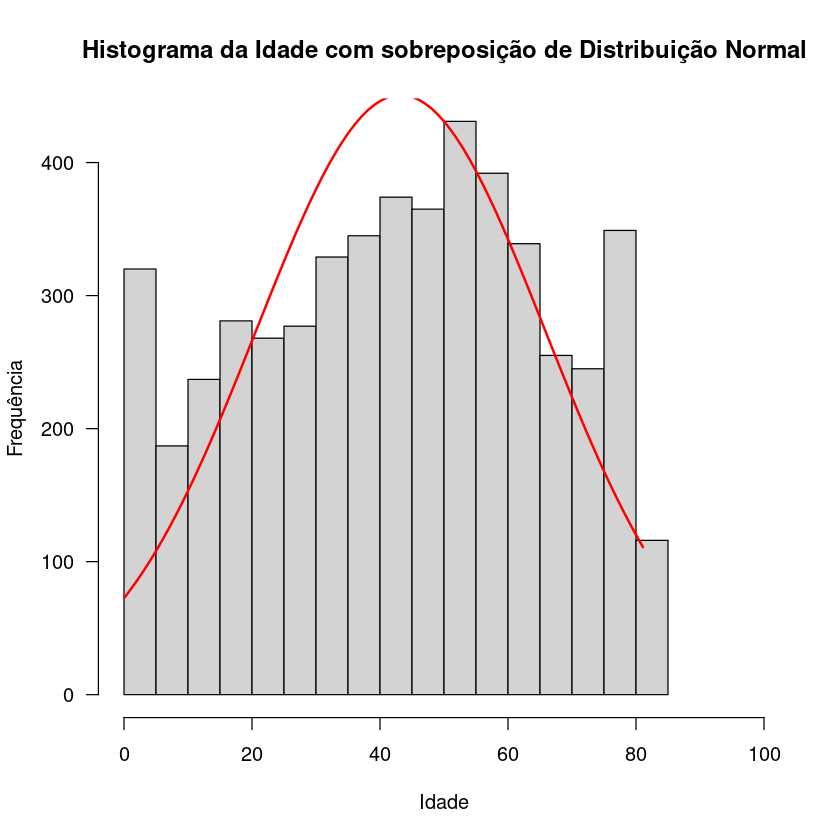

In [33]:
# Histograma da coluna Idade com sobreposição de Distribuição Normal (Gaussiana)

histage <- hist(data2$age,xlim=c(0,100),
                main="Histograma da Idade com sobreposição de Distribuição Normal",
                xlab="Idade",las=1,
                ylab="Frequência", las =1)
xfit <- seq(min(data2$age),max(data2$age))
yfit <- dnorm(xfit,mean=mean(data2$age),sd=sd(data2$age))
yfit <- yfit*diff(histage$mids[2:4])*length(data2$age)
lines(xfit,yfit,col="red",lwd=2)

* As idades dos pacientes no estudo estão próximas de uma distribuição normal, com uma média de idade de 43,23 retirado da função summary().
* Baseado na informação do sumário anteriormente e no gráfico acima, a maioria dos pacientes está em torno dos seus 40 anos.

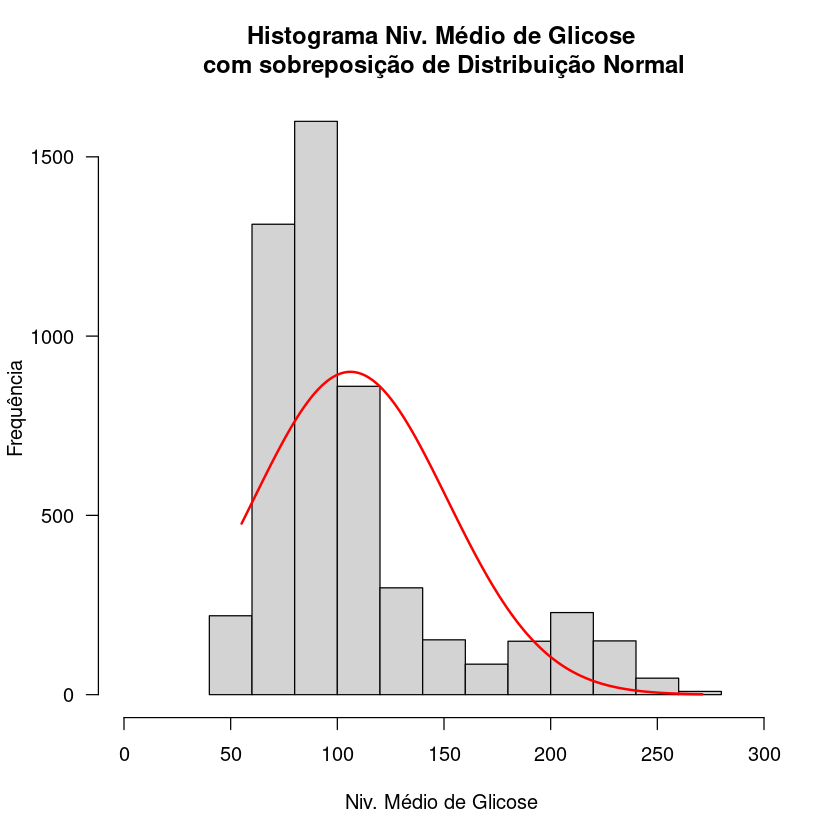

In [34]:
# Histograma da coluna Nível Médio de Glicose com sobreposição de Distribuição Normal.

histglucose <- hist(data2$avg_glucose_level,xlim=c(0,300),
                main="Histograma Niv. Médio de Glicose \ncom sobreposição de Distribuição Normal",
                xlab="Niv. Médio de Glicose ",las=1,
                ylab="Frequência", las =1)
xfit <- seq(min(data2$avg_glucose_level),max(data2$avg_glucose_level))
yfit <- dnorm(xfit,mean=mean(data2$avg_glucose_level),sd=sd(data2$avg_glucose_level))
yfit <- yfit*diff(histglucose$mids[1:2])*length(data2$avg_glucose_level)
lines(xfit,yfit,col="red",lwd=2)

* Os níveis médios de glicose dos pacientes no estudo estão enviesados para a direita, com média de 106,15 retirado da função summary() anteriormente.

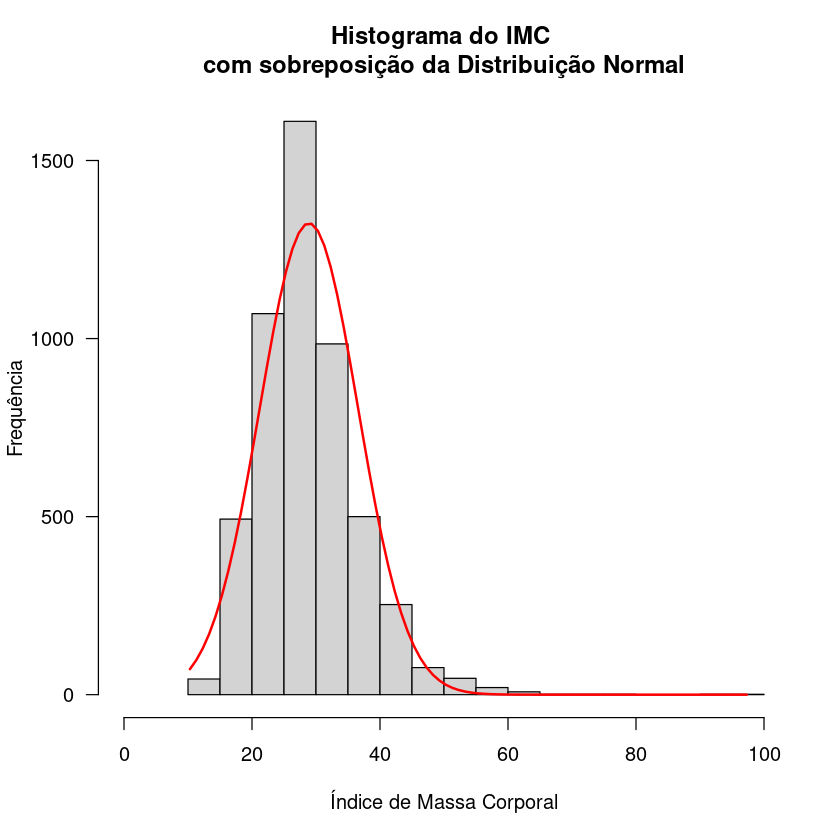

In [35]:
# Histograma do IMC com sobreposição de Distribuição Normal.
histbmi <- hist(data2$bmi,xlim=c(0,100),
                main="Histograma do IMC \ncom sobreposição da Distribuição Normal",
                xlab="Índice de Massa Corporal",las=1,
                ylab="Frequência", las=1)
xfit <- seq(min(data2$bmi),max(data2$bmi))
yfit <- dnorm(xfit,mean=mean(data2$bmi),sd=sd(data2$bmi))
yfit <- yfit*diff(histbmi$mids[1:2])*length(data2$bmi)
lines(xfit,yfit,col="red",lwd=2)


* Os dados de IMC dos pacientes estão enviesados para a direita, com uma média de 28.89 retirado da função summary(), após a modificação.
* Todos os registros "NA" foram atualizados para a média na etapa de Limpeza dos Dados, Parte 2 do estudo.

### Parte 3.3 - Gráficos de Caixa (Boxplot)

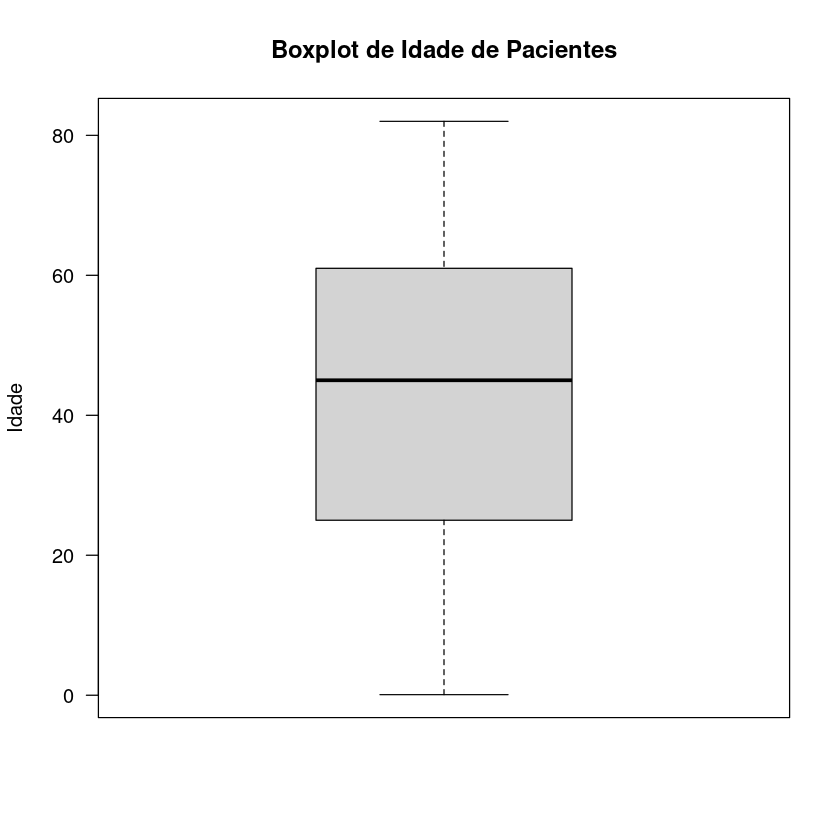

In [36]:
# Boxplot da Idade de Pacientes
boxplot(data2$age,main="Boxplot de Idade de Pacientes",ylab="Idade",las=1)

* O boxplot da Idade dos Pacientes não mostra dados potencialmente discrepantes (outliers)

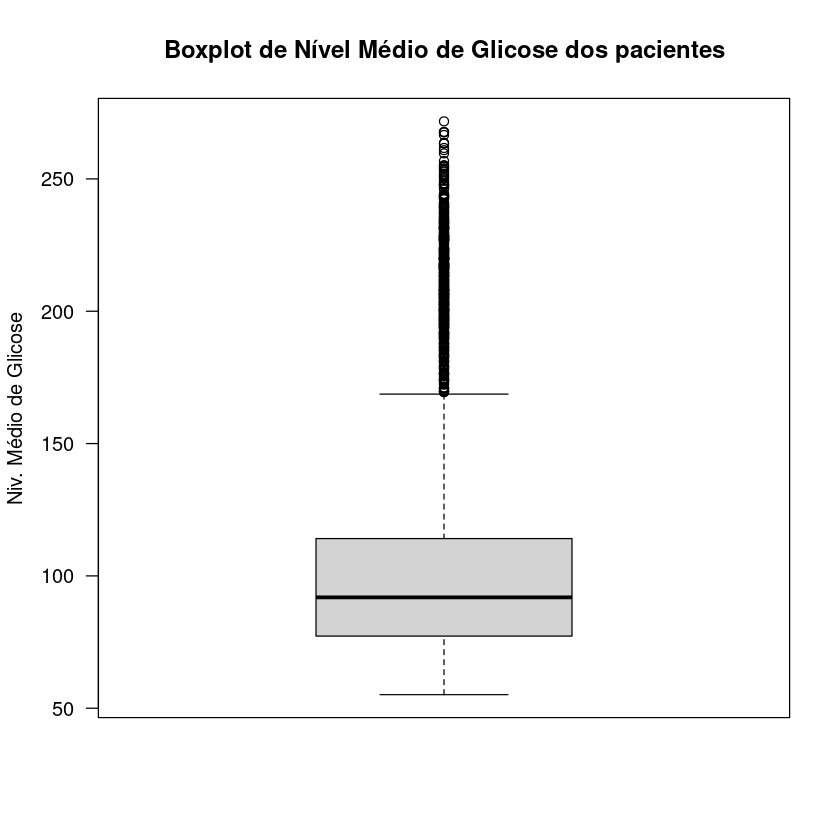

In [37]:
# Boxplot de Nível Médio de Glicose dos pacientes.

boxplot(data2$avg_glucose_level,main="Boxplot de Nível Médio de Glicose dos pacientes",
        ylab="Niv. Médio de Glicose",las=1)


* O Boxplot mostra muitos dados discrepantes em potencial na parte superior do Nível Médio de Glicose dos pacientes.



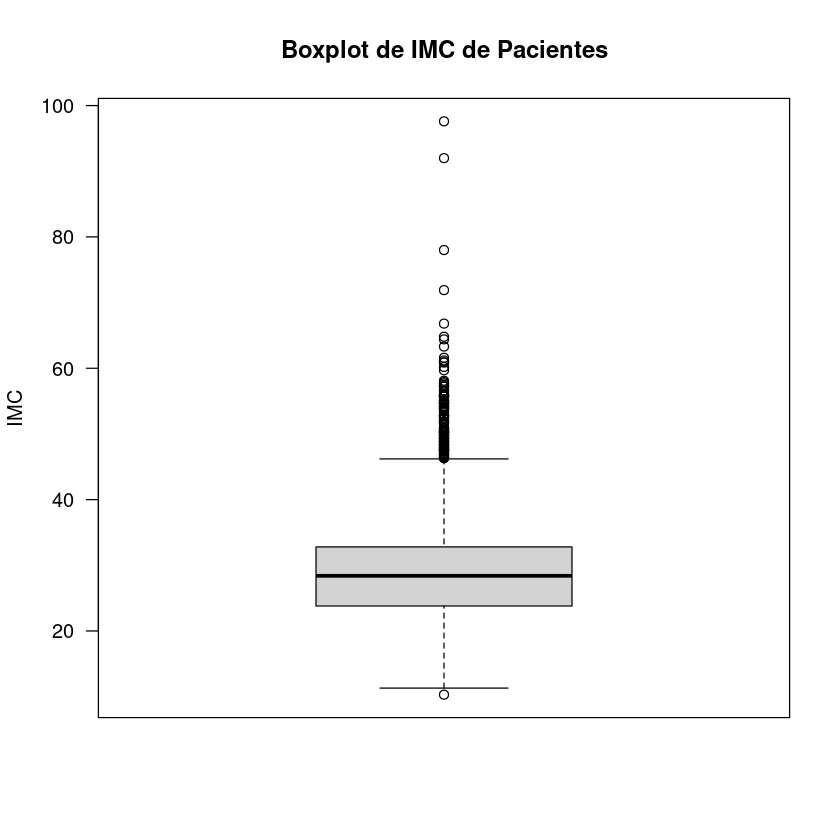

In [38]:
# Boxplot de Índice de Massa Corporal dos pacientes.

boxplot(data2$bmi,main="Boxplot de IMC de Pacientes",ylab="IMC",las=1)

* O Boxplot mostra muitos dados discrepantes em potencial na parte superior do Índice de Massa Corporal dos pacientes.


In [39]:
# Subconjunto de Pacientes que sofreram e que não sofreram AVC em "Yes" e "No"
Yes <- subset(data2, stroke == '1')
No <- subset(data2, stroke == '0')

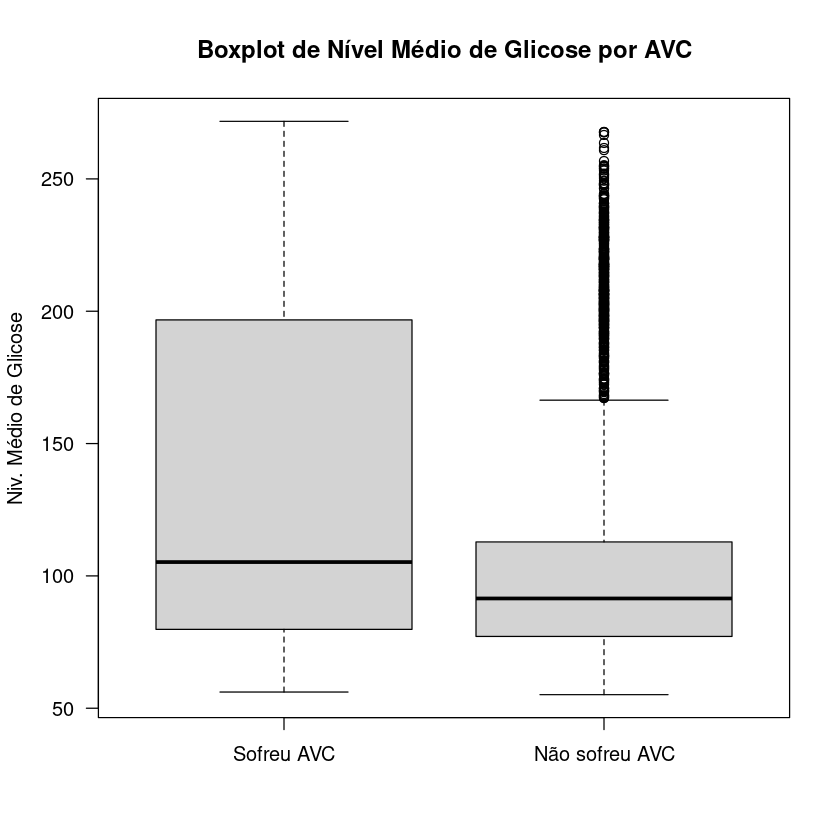

In [40]:
# Boxplot de Nível Médio de Glicose em pacientes que sofreram e não sofreram AVC.
boxplot(Yes$avg_glucose_level,No$avg_glucose_level,
        main="Boxplot de Nível Médio de Glicose por AVC",
        ylab="Niv. Médio de Glicose",las=1,names=c("Sofreu AVC","Não sofreu AVC"))

* O Boxplot mostra a mediana e primeiro quartil relativamente semelhante para nível médio de glicose em pacientes que sofreram e que não sofreram AVC.
* Há muitos outliers entre os pacientes que não sofreram AVC.

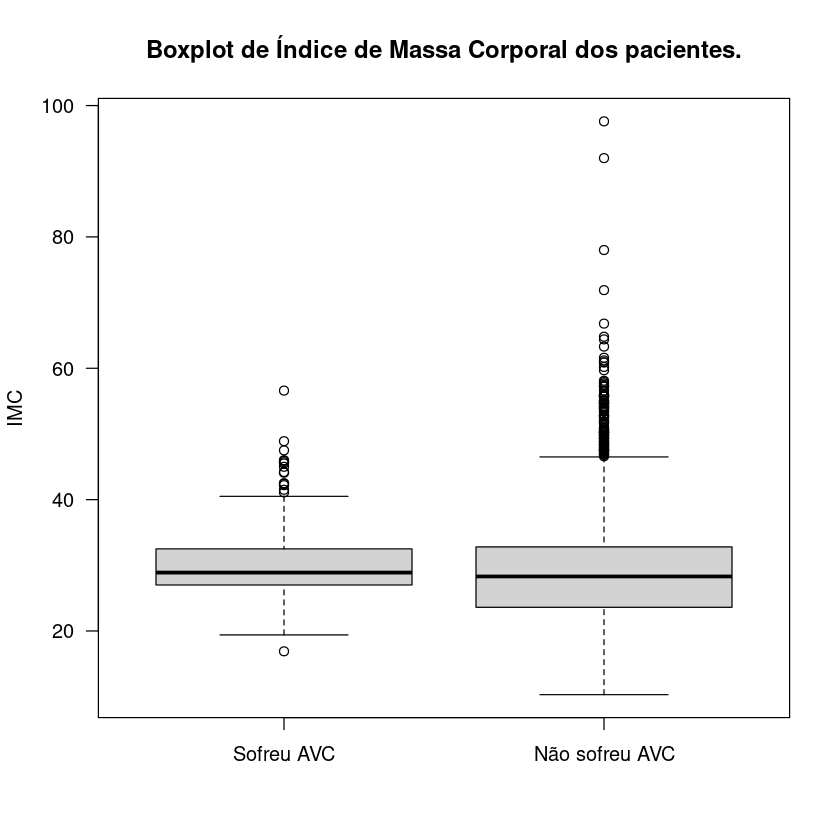

In [41]:
# Boxplot de Índice de Massa Corporal em pacientes que sofreram e não sofreram AVC.

boxplot(Yes$bmi,No$bmi,main="Boxplot de Índice de Massa Corporal dos pacientes.",
        ylab="IMC",las=1,names=c("Sofreu AVC","Não sofreu AVC"))

* O Boxplot mostra a mediana e terceiro quartil relativamente similares para o índice de massa corporal de pacientes que sofreram e que não sofreram AVC.
* Há poucos outliers entre pacientes que sofreram AVC
* Há muitos outliers entre os pacientes que não sofreram AVC.

### Parte 3.4 - Correlogramas

### Correlograma das variáveis numéricas
* O gráfico abaixo, mostra a correlação entre todas as variáveis numéricas nos dados limpos(Parte 2).
* Os valores nas células da diagonal representam os valores de mínimo e máximo. Por exemplo, o menor IMC é 10,3, enquanto que o maior IMC é 97,6.
* A partir do correlograma e da tabela de correação, todas as variáveis numéricas estão positivamente correlacionadas com a variável preditora (AVC).
* A idade tem o maior índice de correlação com o AVC.

In [42]:

library(corrgram)


Attaching package: ‘corrgram’


The following object is masked from ‘package:lattice’:

    panel.fill




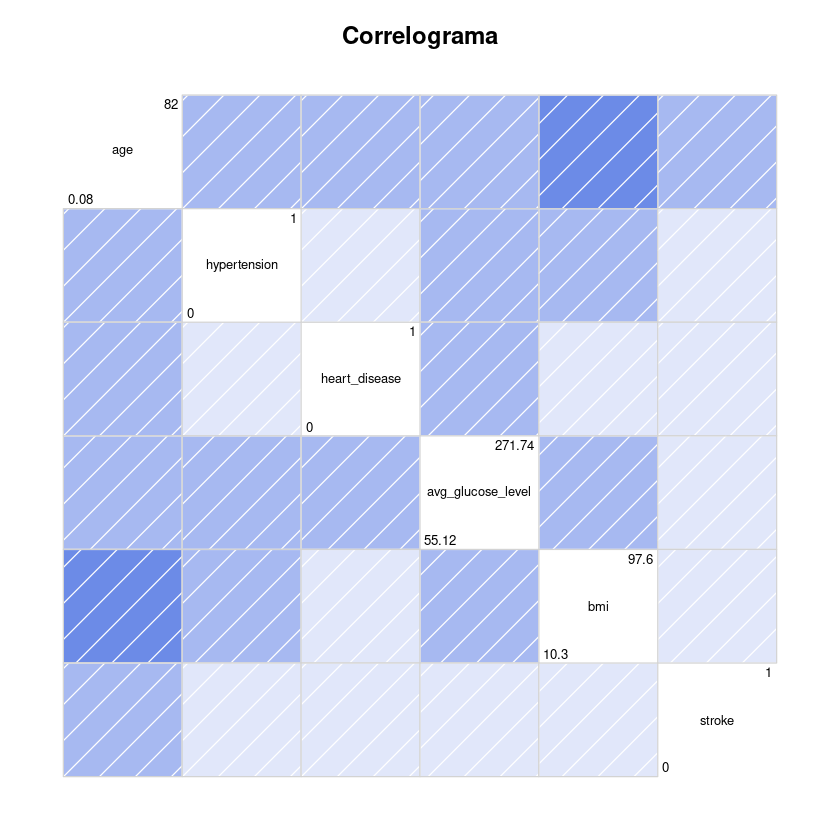

In [43]:
# Cria o correlograma para variáveis numéricas.
corrgram(data2, order=NULL, panel=panel.shade, text.panel=panel.txt,
         diag.panel=panel.minmax, main="Correlograma") 

In [44]:
# Valores de correlação das variáveis numéricas exibidos em 2 casas decimais.
round(cor(subset(data2, select=c(age,hypertension, heart_disease,avg_glucose_level, bmi, stroke))),2) 

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.00,0.28,0.26,0.24,0.33,0.25
hypertension,0.28,1.00,0.11,0.17,0.16,0.13
heart_disease,0.26,0.11,1.00,0.16,0.04,0.13
avg_glucose_level,0.24,0.17,0.16,1.00,0.17,0.13
bmi,0.33,0.16,0.04,0.17,1.00,0.04
stroke,0.25,0.13,0.13,0.13,0.04,1.00


### Correlograma das variáveis numéricas e categóricas.

* A partir da matriz de correlação das variáveis numéricas, concluí-se que há 4 fatores principais para determinar se um paciente será vítima de AVC. São elas, idade, hipertensão, doênça cardíaca, e nível médio de glicose no sangue.
* O gráfico abaixo inclui tanto variáveis númericas quanto categóricas. Os 4 fatores principais permanecem os mesmos.
* A variável que representa pacientes que já foram casados (Ever_married) tem a maior correlação com AVC dentre todas as variáveis categóricas.

In [45]:
library(caret)
library(corrr)
library(rpart)
library(rpart.plot)


In [47]:
# Converte as variáveis categóricas para variáveis numéricas
# o novo dataset se chama data3

dmy <- dummyVars(" ~ .", data = data2)
data3 <- data.frame(predict(dmy, newdata = data2))

# Mostra os cabeçalhos do novo dataset
names(data3)


[1] "genderFemale"                  "genderMale"                   
 [3] "age"                           "hypertension"                 
 [5] "heart_disease"                 "ever_marriedNo"               
 [7] "ever_marriedYes"               "work_typechildren"            
 [9] "work_typeGovt_job"             "work_typeNever_worked"        
[11] "work_typePrivate"              "work_typeSelf.employed"       
[13] "Residence_typeRural"           "Residence_typeUrban"          
[15] "avg_glucose_level"             "bmi"                          
[17] "stroke"                        "smoking.statusformerly.smoked"
[19] "smoking.statusnever.smoked"    "smoking.statussmokes"

In [48]:
# Tabela de correlação
cor_data3 <- correlate(data3)

Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'


In [49]:
# Extrai a correlação relacionada ao AVC
cor_data3%>% focus(stroke)

term,stroke
<chr>,<dbl>
genderFemale,-0.0091171540
genderMale,0.0091171540
age,0.2452573462
hypertension,0.1279038235
heart_disease,0.1349139970
ever_marriedNo,-0.1083397417
ever_marriedYes,0.1083397417
work_typechildren,-0.0838692661
work_typeGovt_job,0.0026767045


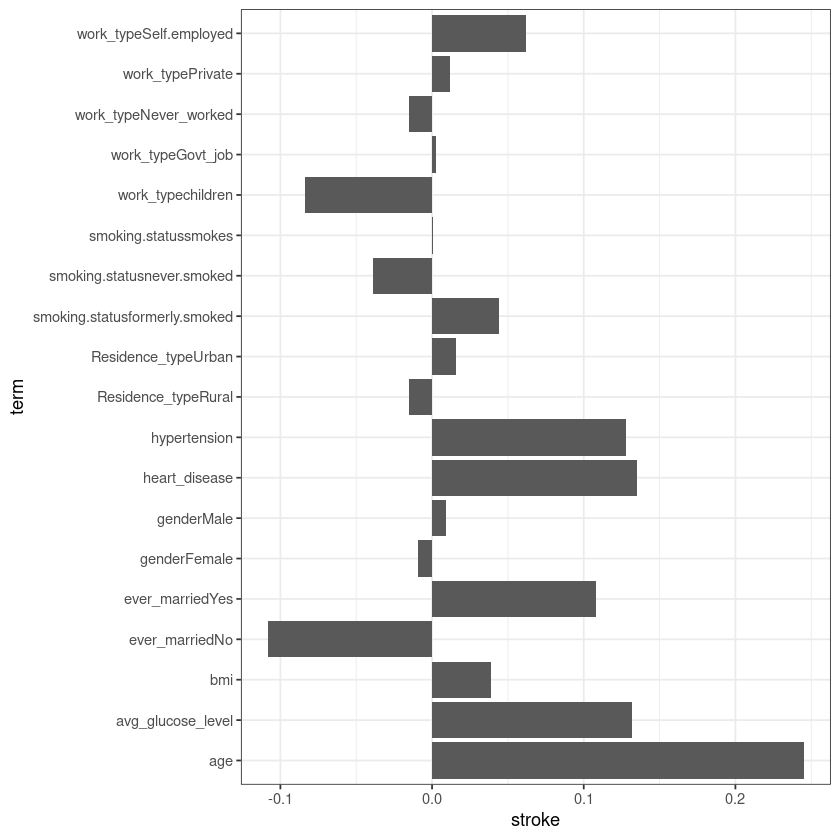

In [50]:
# Gráfico de correlação entre a variável AVC e todas as outras
cor_data3 %>%
  focus(stroke) %>%
  mutate(rowname = reorder(term, stroke)) %>%
  ggplot(aes(term, stroke)) +
    geom_col() + coord_flip() +
  theme_bw()